In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define kernels to plot
K = []
K_name = []

# RBF
K.append(lambda x,y: np.exp(-100*(x-y)*(x-y)))
K_name.append('RBF')
# Brownian noise
K.append(lambda x,y: 1*min(x,y))
K_name.append('Brownian')
# Periodic 
K.append(lambda x,y: np.exp(-1*np.sin(2*np.pi*(x-y))**2) )
K_name.append('Periodic')
# Symetric
K.append(lambda x,y: np.exp(-10*min(np.abs(x-y),np.abs(x+y))))
K_name.append('Symetric') 
# Dot Product 
K.append(lambda x,y: 1*x*y)
K_name.append('Dot') 
#
K.append(lambda x,y: np.exp(-1*np.sqrt((x-y)*(x-y))) )
K_name.append('NNN') 

RBF  Kernel
Smallest Eigen value:  0.000


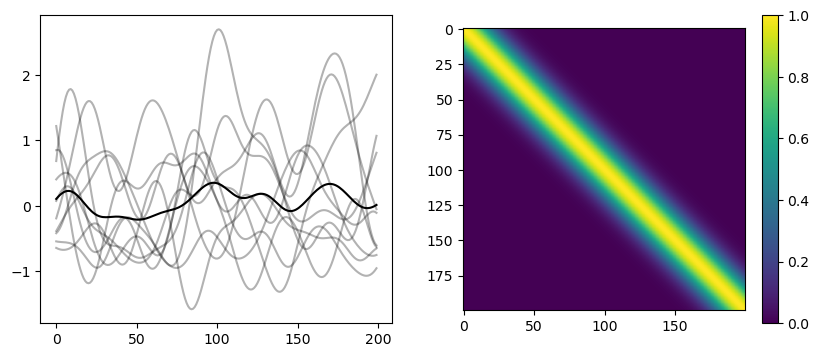

Brownian  Kernel
Smallest Eigen value:  0.000


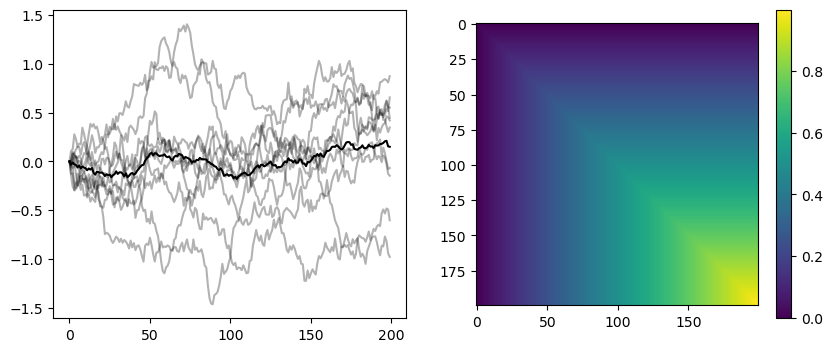

Periodic  Kernel
Smallest Eigen value:  0.000


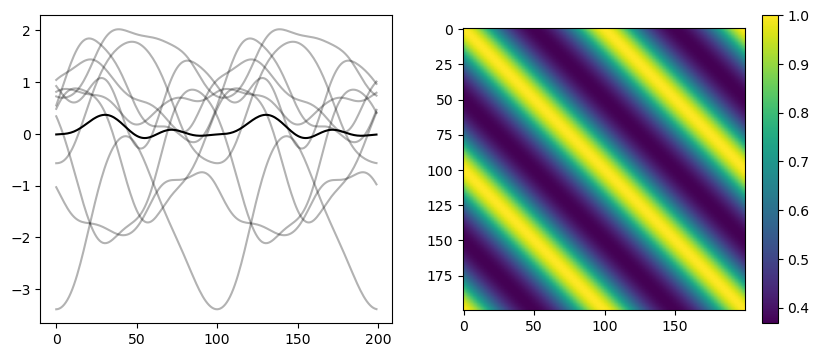

Symetric  Kernel
Smallest Eigen value:  0.025


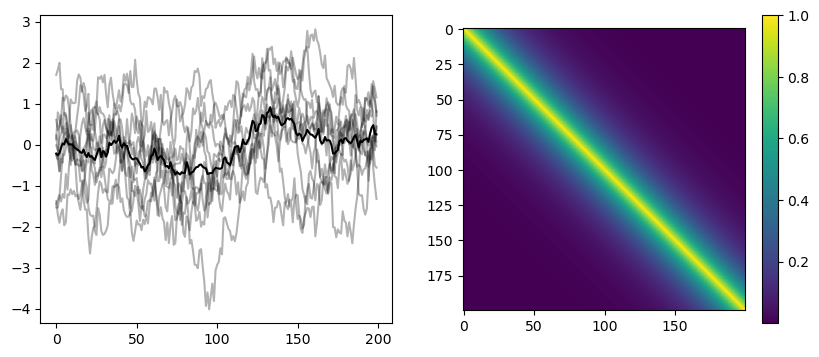

Dot  Kernel
Smallest Eigen value:  0.000


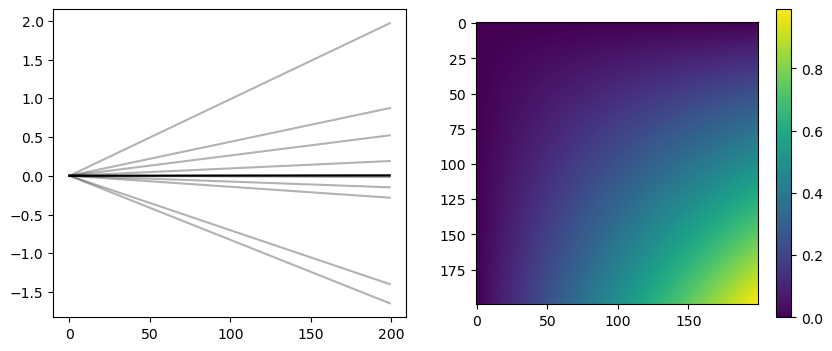

NNN  Kernel
Smallest Eigen value:  0.003


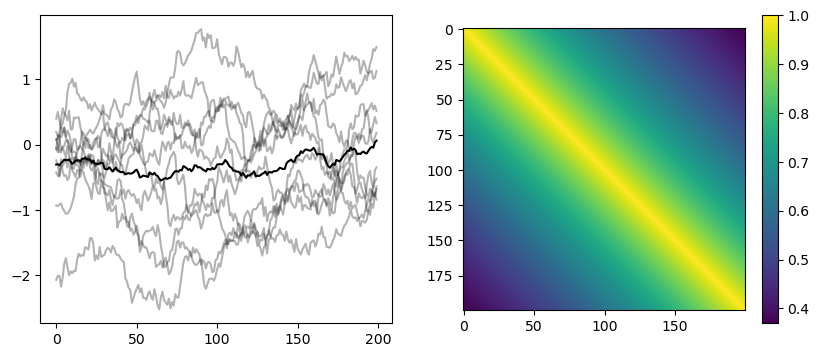

In [3]:
def plot_kernel(kernel, x_range, num_sample):
    n = len(x_range)
    # Get Kernel Covariance
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = kernel(x_range[i], x_range[j])
    # Eigen decomposition of the covariance
    [U, S, V] = np.linalg.svd(C)
    print('Smallest Eigen value: ',"%.3f" % min(S))

    # Generate random samples from the covariance
    u = np.random.randn(n, num_sample)
    z = U@np.sqrt(np.diag(S))@u
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(z, color='k', alpha=0.3)
    plt.plot(np.mean(z, axis=1), color='k')
    plt.subplot(1,2,2)
    plt.imshow(C)
    plt.colorbar()
    plt.show()

x_range = np.arange(0,1,0.005)
num_sample = 10

for kernel, name in zip(K, K_name):
    print(name, ' Kernel')
    plot_kernel(kernel, x_range, num_sample)
